In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path='/content/drive/MyDrive/Data2/zameen-updated.csv'

In [3]:
df=pd.read_csv(file_path)

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [ ]:
df.dtypes

,0
property_id,int64
location_id,int64
page_url,object
property_type,object
price,int64
location,object
city,object
province_name,object
latitude,float64
longitude,float64


In [ ]:
df.shape

(168446, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [ ]:
df.isna().sum()

,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0


In [4]:
col=['page_url','location_id','province_name','latitude', 'longitude','agency','agent','date_added','Area Category','property_id','area','location']

In [5]:
# Remove the columns
df = df.drop(columns=col)
print(df.head())

  property_type     price       city  baths   purpose  bedrooms Area Type  \
0          Flat  10000000  Islamabad      2  For Sale         2     Marla   
1          Flat   6900000  Islamabad      3  For Sale         3     Marla   
2         House  16500000  Islamabad      6  For Sale         5     Marla   
3         House  43500000  Islamabad      4  For Sale         4     Kanal   
4         House   7000000  Islamabad      3  For Sale         3     Marla   

   Area Size  
0        4.0  
1        5.6  
2        8.0  
3        2.0  
4        8.0  


In [ ]:
df['baths'].unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14])

In [ ]:
df['bedrooms'].unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12,  9, 11, 14, 15, 16, 13,
       18, 28, 25, 21, 68, 27])

In [ ]:
df.drop(df[df['baths'] > df['bedrooms']].index, inplace=True)
#'bedrooms' should not be greater than 12
df = df[~((df['baths'] == 0) | (df['baths'] > 10) | (df['bedrooms'] == 0) | (df['bedrooms'] > 12))]


In [ ]:
df['baths'].unique()

array([ 2,  3,  4,  8,  7,  5,  1,  6, 10,  9])

In [ ]:
df['bedrooms'].unique()

array([ 2,  3,  4,  8,  7,  5,  1,  6, 10, 12,  9, 11])

## **Analyzing Distribution of House Price**

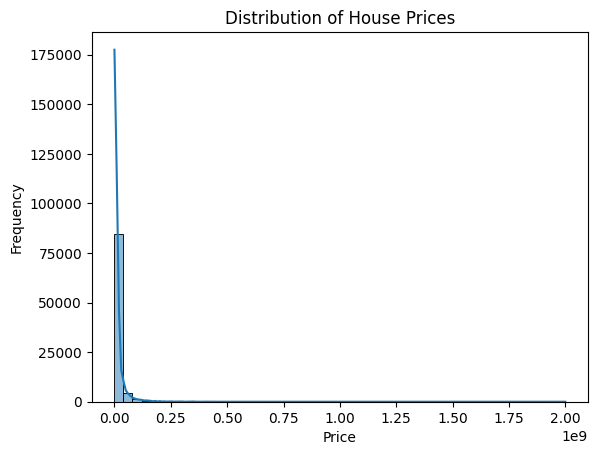

In [ ]:
plt.figure()
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


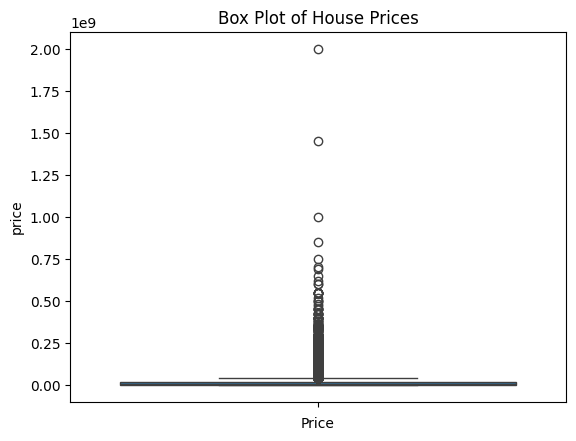

In [ ]:
plt.figure()
sns.boxplot(df['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()


**Feature Engineeering:** Constructing a new feature (Area Size in  sqft) by using two columns Area type and Area size.


In [6]:

def convert_to_sqft(row):
    if row['Area Type'] == 'Marla':
        return row['Area Size'] * 272.25  # Convert Marla to square feet
    elif row['Area Type'] == 'Kanal':
        return row['Area Size'] * 5445    # Convert Kanal to square feet
    else:
        return row['Area Size']


df['Area Size (sqft)'] = df.apply(convert_to_sqft, axis=1)




In [7]:
df.drop(['Area Type', 'Area Size'], axis=1, inplace=True)

In [ ]:
df.head()

,property_type,price,city,baths,purpose,bedrooms,Area Size (sqft)
0,Flat,10000000,Islamabad,2,For Sale,2,1089.0
1,Flat,6900000,Islamabad,3,For Sale,3,1524.6
4,House,7000000,Islamabad,3,For Sale,3,2178.0
5,House,34500000,Islamabad,8,For Sale,8,8712.0
6,House,27000000,Islamabad,8,For Sale,8,5445.0


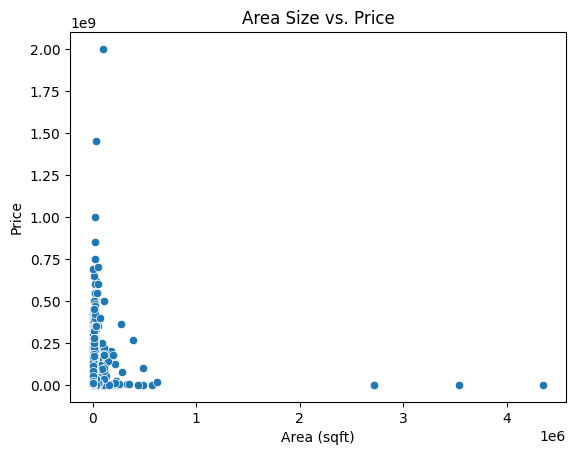

In [ ]:
plt.figure()
sns.scatterplot(x= 'Area Size (sqft)', y='price', data=df)
plt.title('Area Size vs. Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()


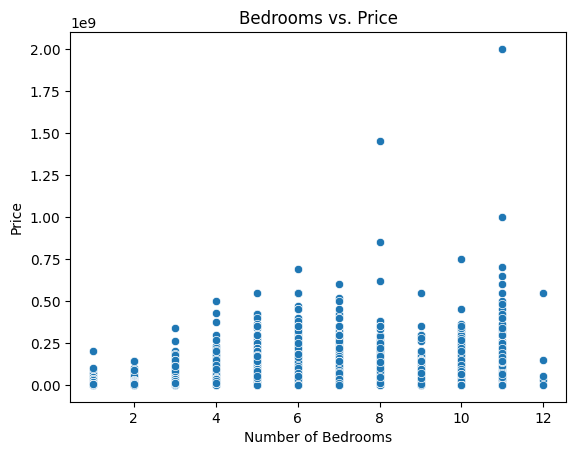

In [ ]:
plt.figure()
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


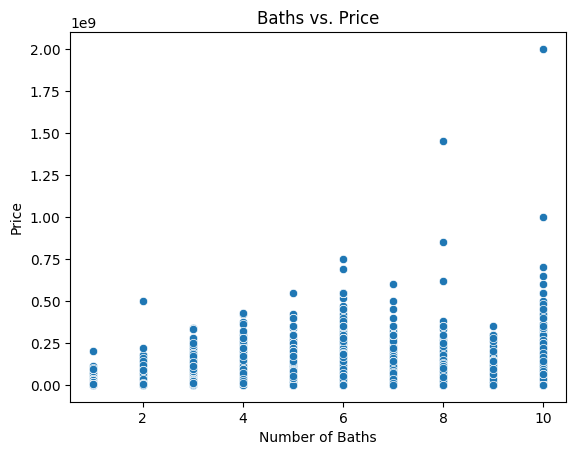

In [ ]:
plt.figure()
sns.scatterplot(x='baths', y='price', data=df)
plt.title('Baths vs. Price')
plt.xlabel('Number of Baths')
plt.ylabel('Price')
plt.show()

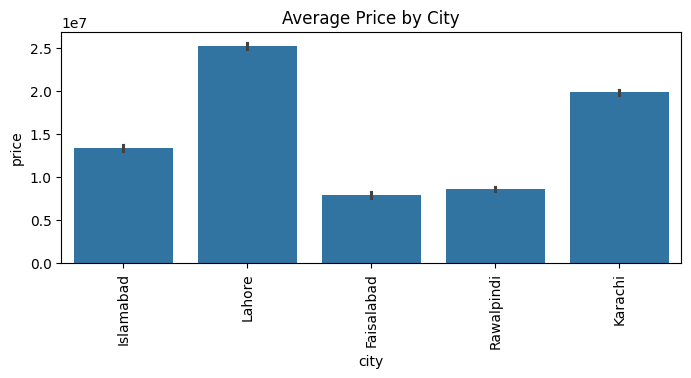

In [8]:
import numpy as np
plt.figure(figsize=(8, 3))
sns.barplot(x='city', y='price', data=df, estimator=np.mean)
plt.title('Average Price by City')
plt.xticks(rotation=90)
plt.show()


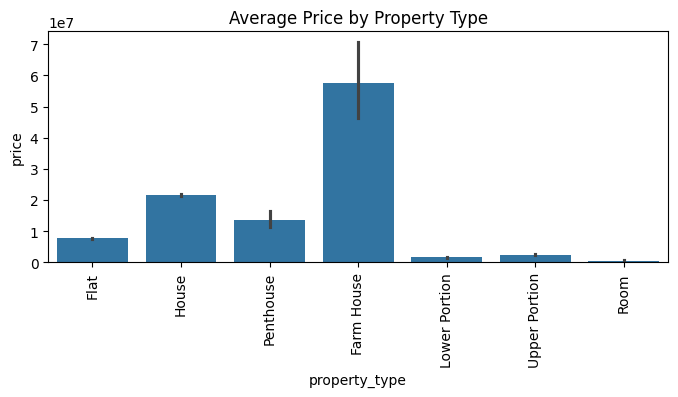

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(x='property_type', y='price', data=df, estimator=np.mean)
plt.title('Average Price by Property Type')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.head()


,property_type,price,city,baths,purpose,bedrooms,Area Size (sqft)
0,Flat,10000000,Islamabad,2,For Sale,2,1089.0
1,Flat,6900000,Islamabad,3,For Sale,3,1524.6
3,House,43500000,Islamabad,4,For Sale,4,10890.0
4,House,7000000,Islamabad,3,For Sale,3,2178.0
5,House,34500000,Islamabad,8,For Sale,8,8712.0


In [9]:
import numpy as np
df['price_per_sqft'] = df['price'] / df['Area Size (sqft)']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['price_per_sqft'], inplace=True)


In [10]:
df.drop(columns=['price', 'Area Size (sqft)'], inplace=True)


In [ ]:
df.head(2)

,property_type,city,baths,purpose,bedrooms,price_per_sqft
0,Flat,Islamabad,2,For Sale,2,9182.736455
1,Flat,Islamabad,3,For Sale,3,4525.777253


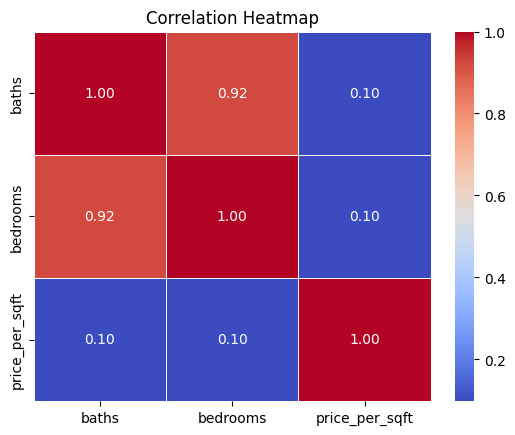

In [ ]:
# Step 1: Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

# Step 3: Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [ ]:
df['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [ ]:
df['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

In [ ]:
# Get the list of feature (column) names
df.columns



Index(['property_type', 'city', 'baths', 'purpose', 'bedrooms',
       'price_per_sqft'],
      dtype='object')

In [ ]:
import pandas as pd

df = pd.get_dummies(df, columns=['property_type', 'city', 'purpose'], drop_first=True)

# View the result
print(df.head())


   baths  bedrooms  price_per_sqft  property_type_Flat  property_type_House  \
0      2         2     9182.736455                True                False   
1      3         3     4525.777253                True                False   
3      4         4     3994.490358               False                 True   
4      3         3     3213.957759               False                 True   
5      8         8     3960.055096               False                 True   

   property_type_Lower Portion  property_type_Penthouse  property_type_Room  \
0                        False                    False               False   
1                        False                    False               False   
3                        False                    False               False   
4                        False                    False               False   
5                        False                    False               False   

   property_type_Upper Portion  city_Islamabad  ci

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Log transformation of price_per_sqft
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

X = df.drop(['price_per_sqft', 'price_per_sqft_log'], axis=1)
y = df['price_per_sqft_log']

# Step 2: Split the data into train (70%), validation (10%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 117903
Validation set size: 16675
Test set size: 33856


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 2: Make predictions on the validation set
y_val_pred_lin = lin_reg.predict(X_val)

# Step 3: Evaluate Linear Regression Model
rmse_lin = np.sqrt(mean_squared_error(y_val, y_val_pred_lin))
r2_lin = r2_score(y_val, y_val_pred_lin)

print("Linear Regression Model Performance:")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R-squared: {r2_lin:.2f}")

Linear Regression Model Performance:
RMSE: 0.50
R-squared: 0.96


In [ ]:
# Step 4: Make predictions on the test set
y_test_pred_lin = lin_reg.predict(X_test)

# Step 5: Evaluate Linear Regression Model on the Test Set
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
r2_test_lin = r2_score(y_test, y_test_pred_lin)

print("Linear Regression Test Set Performance:")
print(f"Test RMSE: {rmse_test_lin:.2f}")
print(f"Test R-squared: {r2_test_lin:.2f}")


Linear Regression Test Set Performance:
Test RMSE: 0.50
Test R-squared: 0.96


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [10, 50],
    'bootstrap': [True]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_val_pred_best_rf = best_rf_model.predict(X_val)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_best_rf))
r2_best_rf = r2_score(y_val, y_val_pred_best_rf)

print("Best Random Forest Model Performance:")
print(f"RMSE: {rmse_best_rf:.2f}")
print(f"R-squared: {r2_best_rf:.2f}")


Best Random Forest Model Performance:
RMSE: 0.47
R-squared: 0.97


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_val_pred_best_rf = best_rf_model.predict(X_val)
rmse_val_best_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_best_rf))
r2_val_best_rf = r2_score(y_val, y_val_pred_best_rf)

# Predict on test set
y_test_pred_best_rf = best_rf_model.predict(X_test)
rmse_test_best_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_best_rf))
r2_test_best_rf = r2_score(y_test, y_test_pred_best_rf)

# Print validation and test performance
print("Validation Set Performance:")
print(f"Validation RMSE: {rmse_val_best_rf:.2f}")
print(f"Validation R-squared: {r2_val_best_rf:.2f}")

print("\nTest Set Performance:")
print(f"Test RMSE: {rmse_test_best_rf:.2f}")
print(f"Test R-squared: {r2_test_best_rf:.2f}")


Validation Set Performance:
Validation RMSE: 0.47
Validation R-squared: 0.97

Test Set Performance:
Test RMSE: 0.47
Test R-squared: 0.97
